# Biodiversity in National Parks

**This project interprets data from the National Parks Service about endangered species in different parks.**

**Area of interest for this analysis:**
- Analyze the classification of the species.
- Investigate if there are any patterns or themes for the types of endangered species.
- Analyze the spread of species at each park, conservation status, and observations.
- Check for association between National Parks and species conservation statuses.

----
## Step 1: Import Libraries and Datasets 


### Project Libraries  

In [1]:
# Central location of the libraries
import numpy as np
import pandas as pd

import matplotlib as mp
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Load and Clean Datasets 

In [2]:
# import and check the head of the file  
observation_df = pd.read_csv('observations.csv')
observation_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
# Not necessary but the park name is shortern by removing 'National Park' 
observation_df['park_name'] = observation_df['park_name'].str.strip('National Park')
observation_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains,68
1,Neovison vison,Great Smoky Mountains,77
2,Prunus subcordata,Yosemite,138
3,Abutilon theophrasti,Bryce,84
4,Githopsis specularioides,Great Smoky Mountains,85


In [4]:
#import and check the head of the file 
species_df = pd.read_csv('species_info.csv')
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
species_df.drop_duplicates()
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [6]:
"""
Species with missing conservation status are assumed not endangered for this analysis; 
the missing values are replaced with 'Not Endangered Species'
"""
species_df['conservation_status'].fillna('Not Endangered Species', inplace=True)

#species_df['conservation_status'].unique()

## Step 2: Descriptive Analysis

### Inspect the Overall Structure of the files 

In [7]:
# Overview observation file content
observation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [8]:
# Statistical summary 
observation_df.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [9]:
# Overview of species file content
species_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


In [10]:
# Statistical summary
species_df.describe()


,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,5824
unique,7,5541,5504,5
top,Vascular Plant,Myotis lucifugus,Brachythecium Moss,Not Endangered Species
freq,4470,3,7,5633


In [11]:
species_df['conservation_status'].unique()


array(['Not Endangered Species', 'Species of Concern', 'Endangered',
       'Threatened', 'In Recovery'], dtype=object)

In [12]:
species_df['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

### Combine Observation and Species Dataset to Analyze National Parks Biodiverity

In [13]:
# Perform outer merger on scientific_name 
observations_species_df = species_df.merge(observation_df, 
                                           how='outer', 
                                           on=['scientific_name'])
observations_species_df.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered Species,Bryce,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered Species,Yellowstone,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered Species,Great Smoky Mountains,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered Species,Yosemite,117
4,Mammal,Bos bison,"American Bison, Bison",Not Endangered Species,Yosemite,128


In [14]:
# Examine overall content of the combines datasets
observations_species_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             25632 non-null  object
 1   scientific_name      25632 non-null  object
 2   common_names         25632 non-null  object
 3   conservation_status  25632 non-null  object
 4   park_name            25632 non-null  object
 5   observations         25632 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [15]:
# statistical summary
observations_species_df.describe()

,observations
count,25632.000000
mean,142.214693
std,69.912475
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


### Overview of Data Points Spread

In [16]:
# Analyze conservation spread of the observations
def check_spread_datapoint(df, xcolumn, ycolumn, boxen_kwargs={}):
    plt.figure(figsize=(15, 6))
    sns.boxenplot(data=df, x=xcolumn, y=ycolumn, **boxen_kwargs)
    plt.title('Distribution of ' + xcolumn + ' and ' + ycolumn)
    #plt.xticks(rotation=5)
    plt.show() 

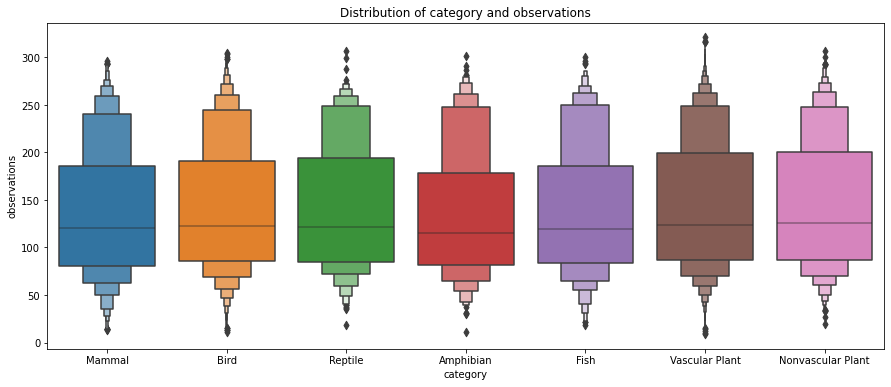

In [17]:
# Analysis of the category of species
check_spread_datapoint(observations_species_df, 
                       'category', 'observations')

There is a wide spread of observations for all categories of species but Mammal, Bird, and Vascular Plant seem to have the widest distributions of obervations.    

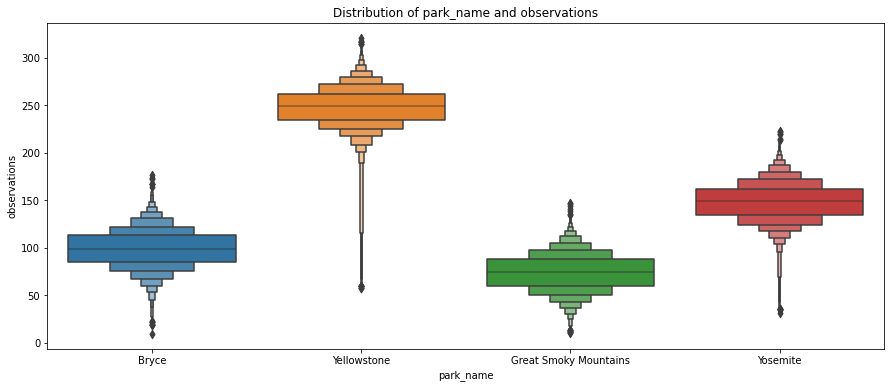

In [18]:
# Check spread of observations at park level
check_spread_datapoint(observations_species_df, 
                       'park_name', 'observations')

It looks like Yellowstone has the largest and the widest range of observations followed by Yosemite then Bryce National Park. Great Smoky Mountains has close to an even spread of observations for the species. 

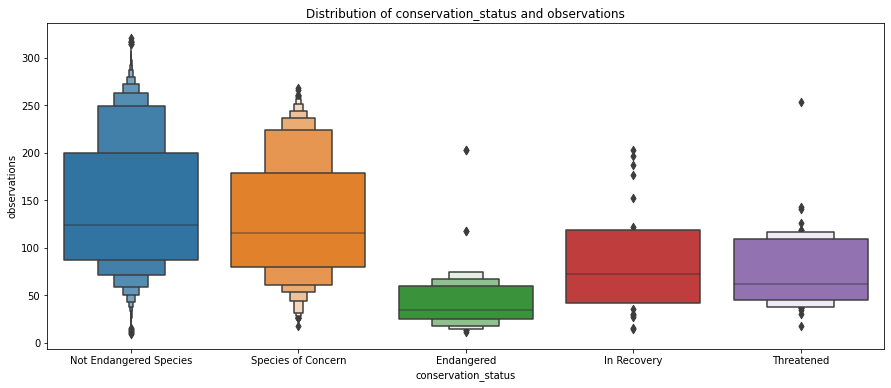

In [19]:
# Analyze conservation spread relative to observations
check_spread_datapoint(observations_species_df, 
                       'conservation_status', 'observations')


There is a great number of species of concern while the number of species that are endangered is less than one third of the species of concern. 

## Step 3: Exploratory Analysis

### Fuctions to Help Automate Analysis 

In [20]:
# Analyze the distributions   
def violin_plot(df, xcolumn, ycolumn, violin_kwargs={}):
    plt.figure(figsize=(15, 6)) 
    
    sns.violinplot(data=df, x=xcolumn, 
                   y=ycolumn, **violin_kwargs)
    
    plt.xlable = xcolumn
    plt.ylable = ycolumn
    plt.title('Analysis of ' + xcolumn + ' and ' + ycolumn) 
    #plt.xticks(rotation=5)
    
    
    plt.show()

In [21]:
# Use to visualize the distributions of species  
def bar_plot(df, xcolumn, ycolumn, bar_kwargs={}):
    plt.figure(figsize=(20, 10)) 
    
    plot_order = df.groupby(xcolumn)[ycolumn].sum()
    
    ax_value = sns.barplot(data=df, x=xcolumn, y=ycolumn, 
                           order=plot_order.sort_values(ascending=True).index, 
                           ci=None, **bar_kwargs) 
    
    for barlabel in ax_value.patches:
        ax_value.annotate(format(barlabel.get_height(), '.0f'), 
                      (barlabel.get_x() + barlabel.get_width() / 2,
                       barlabel.get_height()), ha='center', va='bottom',
                       xytext=(0, 5), textcoords='offset points')
    
    plt.xlable = xcolumn
    plt.ylable = ycolumn
    plt.title('Analysis of ' + xcolumn + ' and ' + ycolumn) 
    #plt.xticks(rotation=5)
    
    
    #plt.show()

In [22]:
# Analyze conservation spread of the observations
def check_spread_datapoint_givendf(df, xcolumn, ycolumn, boxen_kwargs={}):
    plt.figure(figsize=(15, 10))
    sns.boxenplot(data=df, x=xcolumn, y=ycolumn, **boxen_kwargs)
    plt.title('Distribution of ' + xcolumn + ' and ' + ycolumn)
    plt.xticks(rotation=25)
    plt.show() 

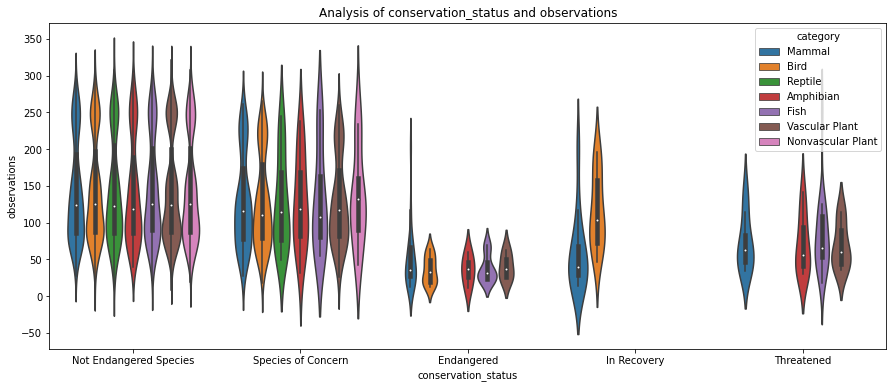

In [23]:
# A view into full distribution of observations across conservation status
violin_param={'hue':'category'}
violin_plot(observations_species_df, 'conservation_status', 
            'observations', violin_kwargs=violin_param)

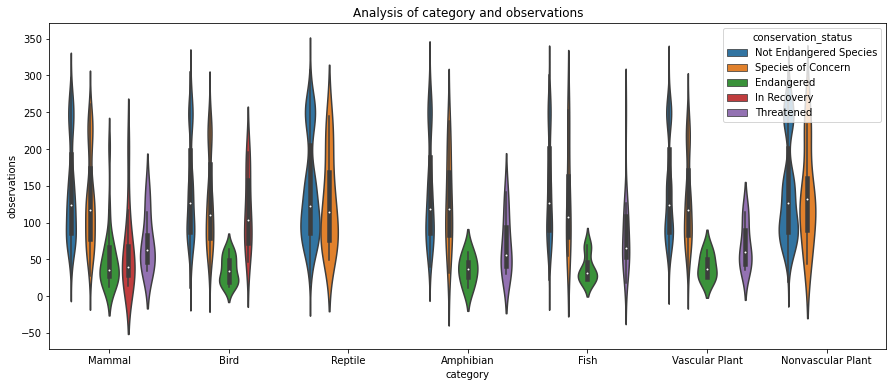

In [24]:
# A view into full distribution of observations across category
violin_param={'hue':'conservation_status'}
violin_plot(observations_species_df, 'category', 
            'observations', violin_kwargs=violin_param)

Key observations:
- Waste majority of species are not on conservation.
- Only Mammal and Bird categories are in recovery from conservation status. 
- Reptile category has species of concern and endangered, threatened, or in recovery species.  

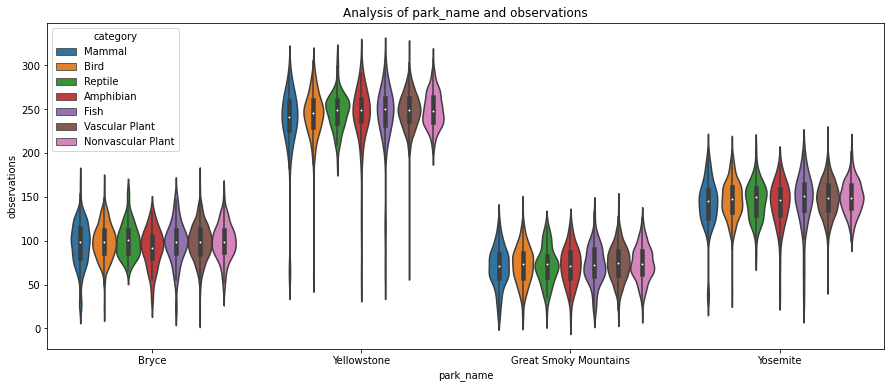

In [25]:
# A view into full distribution of observations across parks
violin_param={'hue':'category'}
violin_plot(observations_species_df, 'park_name', 
            'observations', violin_kwargs=violin_param)

Each National Park is home to the categories of species profiled which can be evidence of biodiversity at each National Park. Yellowstone Park has the widest array of species with the most variations whereby Great Smoky Mountains seems to house an equal count of the categories. Reptile and Nonvascular Plant look to be abundant and do not need to be placed on the conservation list.  

### Profile the Species Based on Assigned Conservation Status 

In [26]:
# Species with 'Threatened' conservation status
conservation_status_threatened = observations_species_df[
    observations_species_df['conservation_status'] == 'Threatened']

conservation_status_threatened.groupby(['category', 'scientific_name']).describe()

observations                      \
                                                    count     mean        std   
category       scientific_name                                                  
Amphibian      Anaxyrus canorus                       4.0   68.500  38.923001   
               Rana draytonii                         4.0   72.500  47.731890   
Fish           Erimonax monachus                      4.0   60.500  38.475100   
               Noturus flavipinnis                    4.0   72.250  38.733061   
               Oncorhynchus clarkii henshawi          4.0   75.250  28.570089   
               Oncorhynchus mykiss                    8.0  101.625  68.349809   
Mammal         Myotis septentrionalis                 4.0   75.500  47.738873   
               Ursus arctos horribilis                4.0   69.000  33.931303   
Vascular Plant Isotria medeoloides                    4.0   68.500  36.565011   
               Spiraea virginiana                     4.0   69.500  30.512293   

                                                                                
                                               min    25%   50%     75%    max  
category       scientific_name                                                  
Amphibian      Anaxyrus canorus               30.0  39.75  65.0   93.75  114.0  
               Rana draytonii                 37.0  41.50  56.0   87.00  141.0  
Fish           Erimonax monachus              18.0  39.00  57.5   79.00  109.0  
               Noturus flavipinnis            36.0  50.25  63.5   85.50  126.0  
               Oncorhynchus clarkii henshawi  48.0  54.75  71.0   91.50  111.0  
               Oncorhynchus mykiss            39.0  59.00  83.0  118.25  253.0  
Mammal         Myotis septentrionalis         34.0  47.50  62.5   90.50  143.0  
               Ursus arctos horribilis        38.0  47.00  61.5   83.50  115.0  
Vascular Plant Isotria medeoloides            36.0  40.50  62.0   90.00  114.0  
               Spiraea virginiana             45.0  54.00  59.5   75.00  114.0

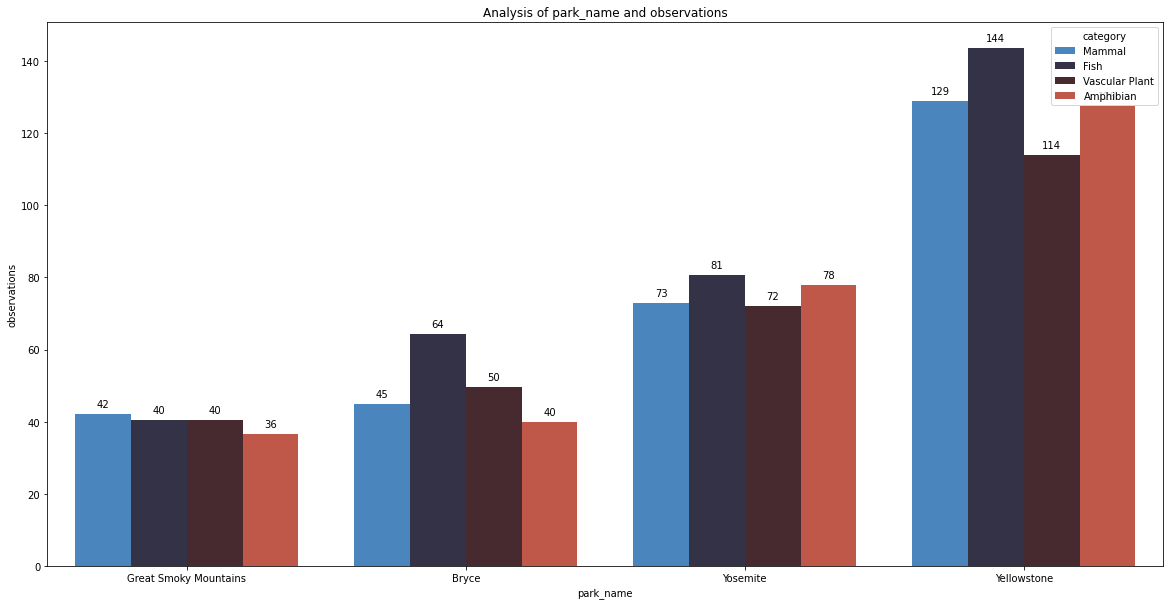

In [27]:
bar_param={'hue':'category', 'palette':'icefire'}
bar_plot(conservation_status_threatened, 'park_name', 
         'observations', bar_kwargs=bar_param)
#plt.xticks(rotation=5)
    
    
plt.show()

Key observations:
- Biodiversity at Great Smoky Mountains is balanced between Mammal, Fish, Vascular Plant, and Amphibian. 
- Vascular plant is the most threatened species at all National Parks except at Great Smoky Mountains.

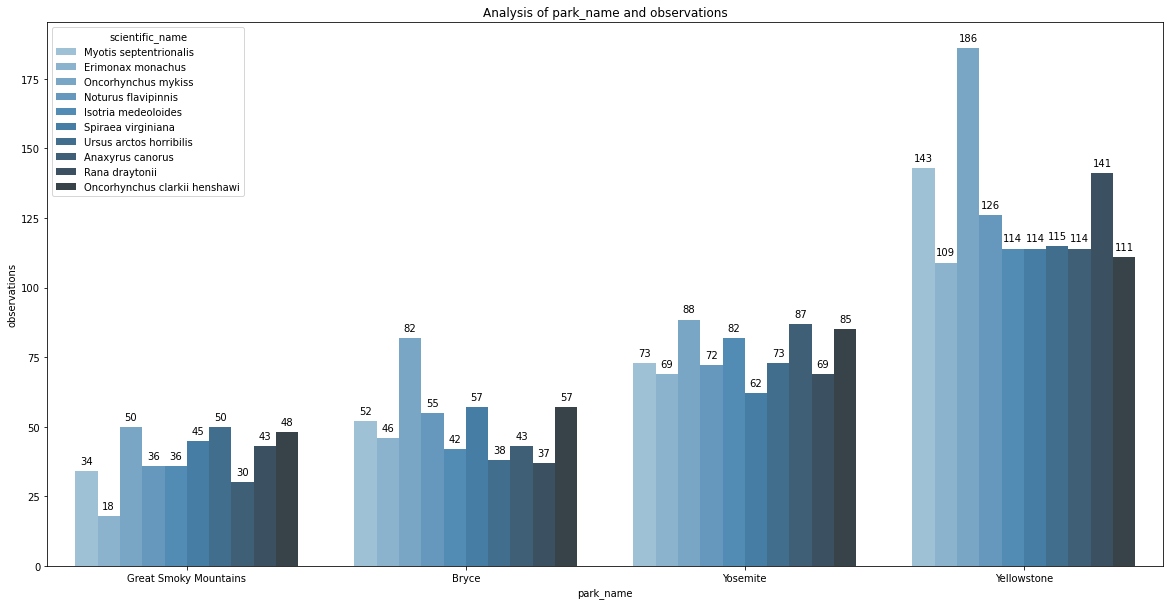

In [28]:
# Visualize species that are under threat based on location
bar_param={'hue':'scientific_name', 'palette':'Blues_d'}
bar_plot(conservation_status_threatened, 'park_name', 
         'observations', bar_kwargs=bar_param)
#plt.xticks(rotation=25)
    
    
plt.show()

A deep dive into the scientific names of the threatened species did not yield a large list of species, there are only ten species classified as threatened.  

In [29]:
# Species with 'Species of Concern' conservation status
conservation_speciesofconcern = observations_species_df[
    observations_species_df['conservation_status'] == 'Species of Concern']

conservation_speciesofconcern.groupby(['category', 'scientific_name']).describe()

observations  \
                                                                 count   
category       scientific_name                                           
Amphibian      Cryptobranchus alleganiensis alleganiensis          4.0   
               Desmognathus wrighti                                4.0   
               Hydromantes platycephalus                           4.0   
               Rana luteiventris                                   4.0   
Bird           Accipiter cooperii                                  4.0   
...                                                                ...   
Vascular Plant Tofieldia glabra                                    4.0   
               Trifolium bolanderi                                 4.0   
               Trillium pusillum var. pusillum                     4.0   
               Vaccinium hirsutum                                  4.0   
               Zizia trifoliata                                    4.0   

                                                                              \
                                                             mean        std   
category       scientific_name                                                 
Amphibian      Cryptobranchus alleganiensis alleganiensis  122.00  71.530879   
               Desmognathus wrighti                        127.00  52.484918   
               Hydromantes platycephalus                   138.50  49.142650   
               Rana luteiventris                           123.50  92.543683   
Bird           Accipiter cooperii                          135.75  78.754365   
...                                                           ...        ...   
Vascular Plant Tofieldia glabra                            125.75  70.039870   
               Trifolium bolanderi                         138.50  76.063570   
               Trillium pusillum var. pusillum             141.75  63.751471   
               Vaccinium hirsutum                          121.50  66.855566   
               Zizia trifoliata                            135.00  72.888042   

                                                                         \
                                                            min     25%   
category       scientific_name                                            
Amphibian      Cryptobranchus alleganiensis alleganiensis  58.0   85.75   
               Desmognathus wrighti                        85.0   92.50   
               Hydromantes platycephalus                   75.0  114.75   
               Rana luteiventris                           31.0   59.50   
Bird           Accipiter cooperii                          65.0   87.50   
...                                                         ...     ...   
Vascular Plant Tofieldia glabra                            70.0   73.75   
               Trifolium bolanderi                         76.0   90.25   
               Trillium pusillum var. pusillum             84.0   99.75   
               Vaccinium hirsutum                          58.0   82.00   
               Zizia trifoliata                            80.0   85.25   

                                                                          \
                                                             50%     75%   
category       scientific_name                                             
Amphibian      Cryptobranchus alleganiensis alleganiensis  103.0  139.25   
               Desmognathus wrighti                        111.0  145.50   
               Hydromantes platycephalus                   145.0  168.75   
               Rana luteiventris                           112.5  176.50   
Bird           Accipiter cooperii                          116.5  164.75   
...                                                          ...     ...   
Vascular Plant Tofieldia glabra                            106.5  158.50   
               Trifolium bolanderi                         116.0  164.25   
             

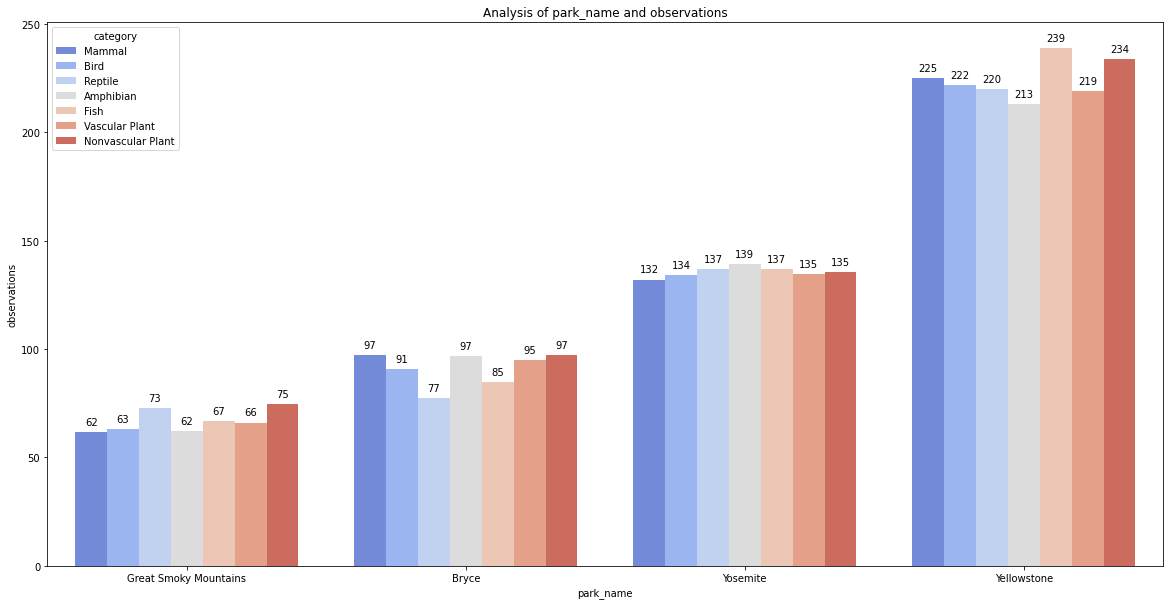

In [30]:
# Determine observation of species of concern for each Park
bar_param={'hue':'category', 'palette':'coolwarm'}
bar_plot(conservation_speciesofconcern, 'park_name', 
         'observations', bar_kwargs=bar_param)
#plt.xticks(rotation=5)
    
    
plt.show()

In [31]:
# Species with 'In Recovery' conservation status
conservation_inrecovery = observations_species_df[
    observations_species_df['conservation_status'] == 'In Recovery']

conservation_inrecovery.groupby(['category', 'scientific_name']).describe()
#conservation_inrecovery.head(30)

observations                               \
                                         count        mean        std   min   
category scientific_name                                                      
Bird     Falco peregrinus anatum           4.0  117.500000  54.586323  70.0   
         Haliaeetus leucocephalus          4.0  116.250000  49.922440  72.0   
         Pelecanus occidentalis            4.0  114.250000  62.611900  47.0   
Mammal   Canis lupus                      12.0   59.583333  53.862550  14.0   

                                                                
                                     25%    50%     75%    max  
category scientific_name                                        
Bird     Falco peregrinus anatum   71.50  112.0  158.00  176.0  
         Haliaeetus leucocephalus  88.50  103.0  130.75  187.0  
         Pelecanus occidentalis    80.75  107.0  140.50  196.0  
Mammal   Canis lupus               28.50   39.5   68.75  203.0

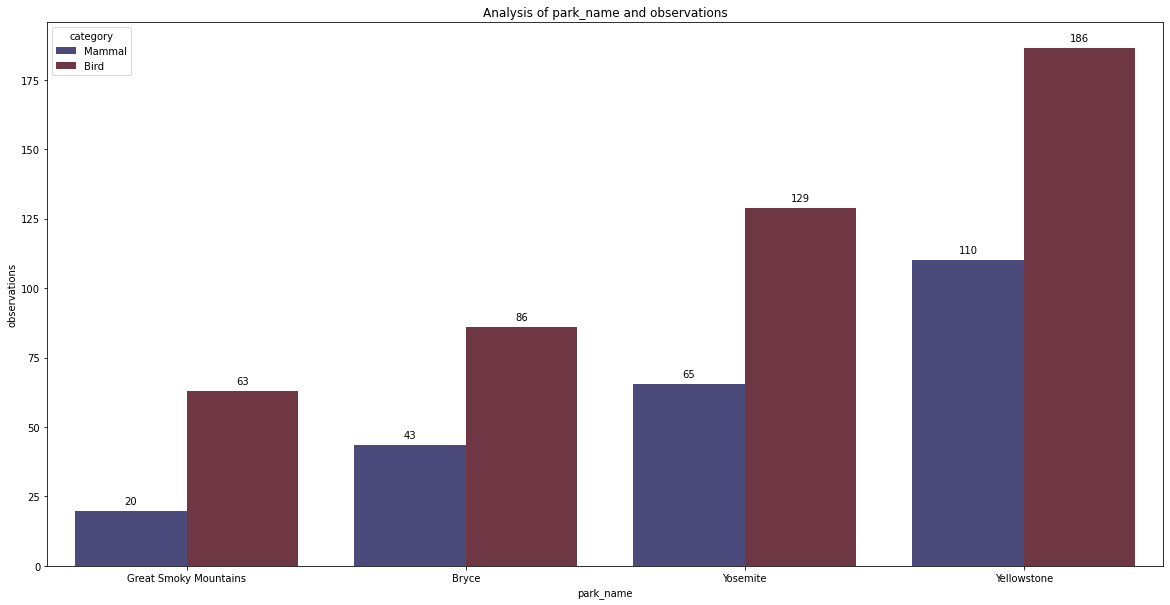

In [32]:
# Spread of species in recovery of being extinct 
bar_param={'hue':'category', 'palette':'icefire'}
bar_plot(conservation_inrecovery, 'park_name', 
         'observations', bar_kwargs=bar_param)
#plt.xticks(rotation=5)
        
plt.show()

Although Mammal and Bird are the only species in recovery at all the National Parks, and the number of birds recovering from conservation are greater than Mammal     

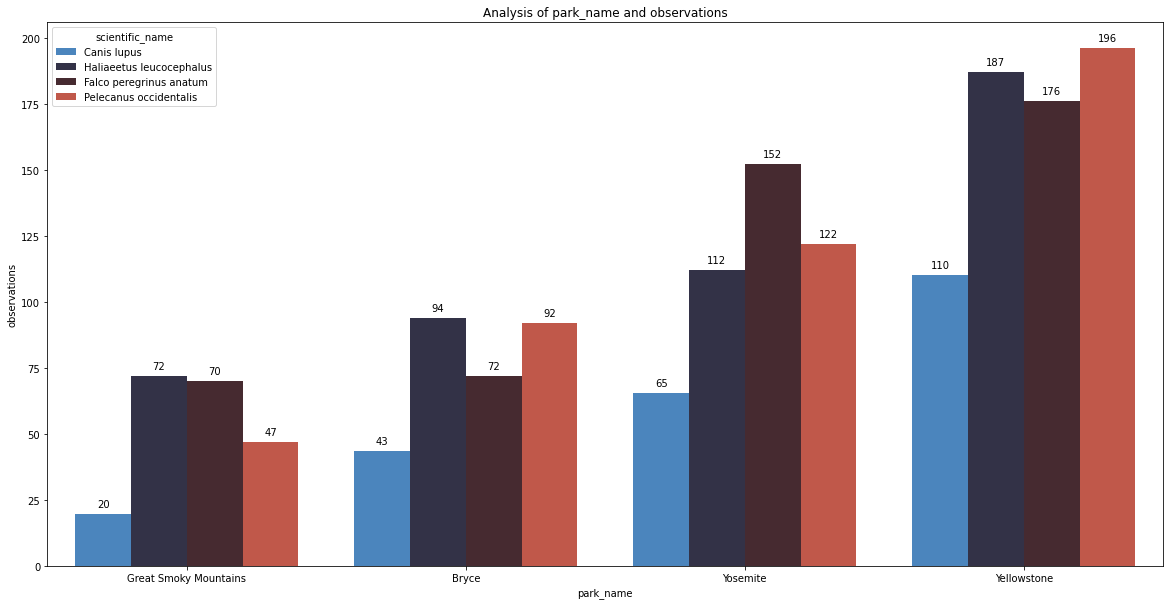

In [33]:
bar_param={'hue':'scientific_name', 'palette':'icefire'}
bar_plot(conservation_inrecovery, 'park_name', 
         'observations', bar_kwargs=bar_param)
#plt.xticks(rotation=25)
        
plt.show()

In [34]:
# Species with 'Endangered' conservation status
conservation_endangered = observations_species_df[
    observations_species_df['conservation_status'] == 'Endangered']

conservation_endangered.groupby(['category', 'scientific_name']).describe()

observations             \
                                                   count       mean   
category       scientific_name                                        
Amphibian      Rana sierrae                          4.0  36.000000   
Bird           Grus americana                        4.0  32.750000   
               Gymnogyps californianus               4.0  39.000000   
               Picoides borealis                     4.0  36.500000   
               Vermivora bachmanii                   4.0  35.250000   
Fish           Chasmistes liorus                     4.0  36.500000   
               Etheostoma percnurum                  4.0  41.500000   
               Noturus baileyi                       4.0  35.750000   
Mammal         Canis lupus                          24.0  59.583333   
               Canis rufus                           4.0  34.250000   
               Glaucomys sabrinus coloratus          4.0  38.250000   
               Myotis grisescens                     4.0  40.000000   
               Myotis sodalis                        4.0  36.250000   
               Ovis canadensis sierrae               4.0  38.250000   
Vascular Plant Geum radiatum                         4.0  40.500000   

                                                                           \
                                                   std   min    25%   50%   
category       scientific_name                                              
Amphibian      Rana sierrae                  20.510160  11.0  26.00  36.5   
Bird           Grus americana                18.909874  13.0  21.25  30.5   
               Gymnogyps californianus       21.181753  15.0  26.25  38.5   
               Picoides borealis             21.733231  15.0  21.75  33.5   
               Vermivora bachmanii           19.517087  18.0  19.50  32.5   
Fish           Chasmistes liorus             19.824228  23.0  23.00  29.0   
               Etheostoma percnurum          19.974984  25.0  29.50  35.5   
               Noturus baileyi               21.219095  22.0  22.75  27.0   
Mammal         Canis lupus                   52.678613  14.0  28.50  39.5   
               Canis rufus                   19.431504  13.0  25.75  32.0   
               Glaucomys sabrinus coloratus  20.122541  21.0  27.00  32.5   
               Myotis grisescens             19.578900  26.0  26.75  33.0   
               Myotis sodalis                23.012678  14.0  23.75  31.5   
               Ovis canadensis sierrae       20.548723  22.0  24.25  32.0   
Vascular Plant Geum radiatum                 17.990738  25.0  26.50  37.0   

                                                           
                                               75%    max  
category       scientific_name                             
Amphibian      Rana sierrae                  46.50   60.0  
Bird           Grus americana                42.00   57.0  
               Gymnogyps californianus       51.25   64.0  
               Picoides borealis             48.25   64.0  
               Vermivora bachmanii           48.25   58.0  
Fish           Chasmistes liorus             42.50   65.0  
               Etheostoma percnurum          47.50   70.0  
               Noturus baileyi               40.00   67.0  
Mammal         Canis lupus                   68.75  203.0  
               Canis rufus                   40.50   60.0  
               Glaucomys sabrinus coloratus  43.75   67.0  
               Myotis grisescens             46.25   68.0  
               Myotis sodalis                44.00   68.0  
               Ovis canadensis sierrae       46.00   67.0  
Vascular Plant Geum radiatum                 51.00   63.0

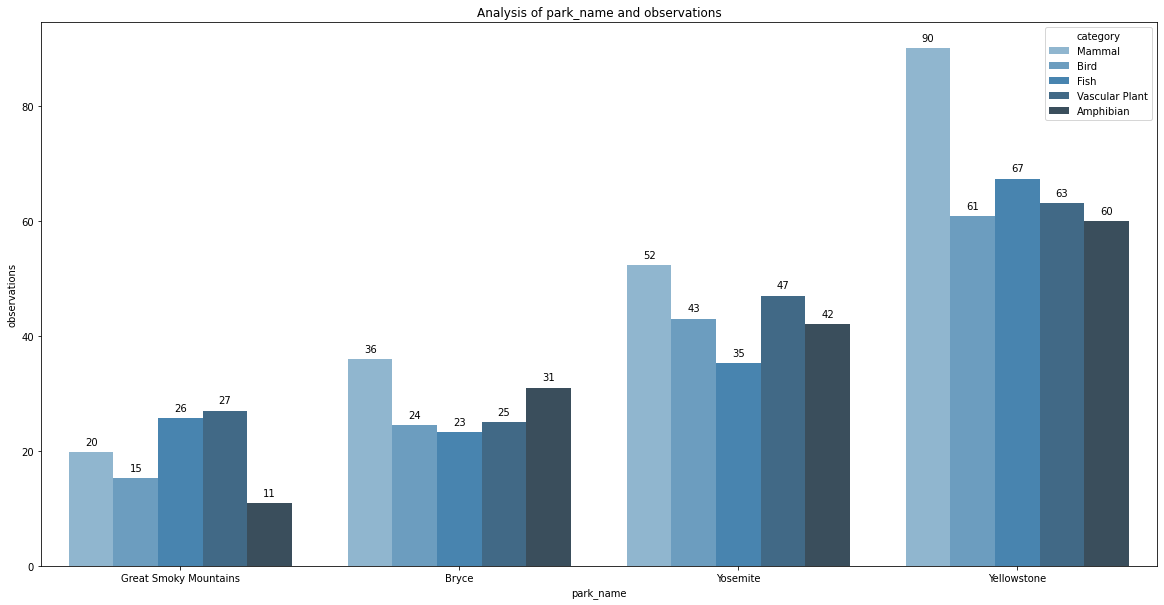

In [35]:
bar_param={'hue':'category', 'palette':'Blues_d'}
bar_plot(conservation_endangered, 'park_name', 
         'observations', bar_kwargs=bar_param)
#plt.xticks(rotation=5)  
    
plt.show()

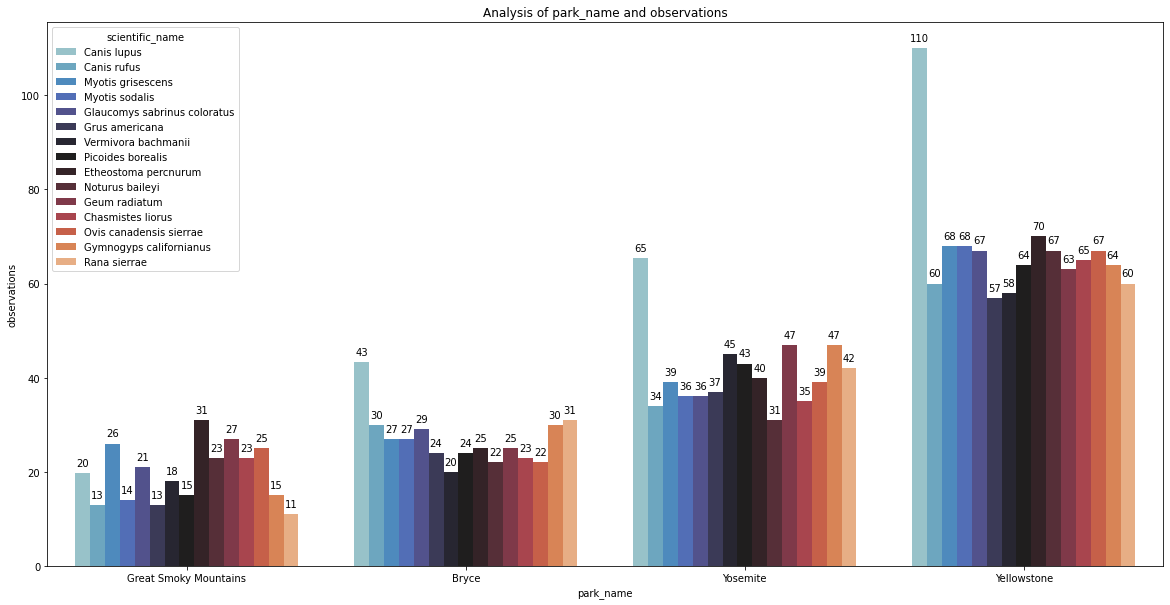

In [36]:
bar_param={'hue':'scientific_name', 'palette':'icefire'}
bar_plot(conservation_endangered, 'park_name', 
         'observations', bar_kwargs=bar_param)
#plt.xticks(rotation=25)  
    
plt.show()

### Check for Association Between the Data Points

In [37]:
# Use contingency table to check for association between category and conservation 
contingency_table_freq = pd.crosstab(observations_species_df.category,
                                     observations_species_df.conservation_status)
print('A look at the contingency table: \n \n {}'.format(contingency_table_freq))


A look at the contingency table: 
 
 conservation_status  Endangered  In Recovery  Not Endangered Species  \
category                                                               
Amphibian                     4            0                     300   
Bird                         16           12                    2016   
Fish                         12            0                     476   
Mammal                       44           12                     968   
Nonvascular Plant             0            0                    1312   
Reptile                       0            0                     304   
Vascular Plant                4            0                   19376   

conservation_status  Species of Concern  Threatened  
category                                             
Amphibian                            16           8  
Bird                                320           0  
Fish                                 16          20  
Mammal                              168     

In [38]:
# View the data points association in terms of proportions
contingency_table_prop = pd.crosstab(observations_species_df.category, 
                                     observations_species_df.conservation_status,
                                     normalize=True)

print('A look at the contingency table: \n {}'.format(contingency_table_prop))

A look at the contingency table: 
 conservation_status  Endangered  In Recovery  Not Endangered Species  \
category                                                               
Amphibian              0.000156     0.000000                0.011704   
Bird                   0.000624     0.000468                0.078652   
Fish                   0.000468     0.000000                0.018571   
Mammal                 0.001717     0.000468                0.037765   
Nonvascular Plant      0.000000     0.000000                0.051186   
Reptile                0.000000     0.000000                0.011860   
Vascular Plant         0.000156     0.000000                0.755930   

conservation_status  Species of Concern  Threatened  
category                                             
Amphibian                      0.000624    0.000312  
Bird                           0.012484    0.000000  
Fish                           0.000624    0.000780  
Mammal                         0.006554    0.0

In [39]:
# Run ANOVA to understand association significance between conservation and observations
#not_endangered_species = observations_species_df.observations[
#    observations_species_df['conservation_status'] =='Not Endangered Species']

species_of_concern = observations_species_df.observations[
    observations_species_df['conservation_status'] == 'Species of Concern']

endangered_species = observations_species_df.observations[
    observations_species_df['conservation_status'] == 'Endangered']

threatened_species = observations_species_df.observations[
    observations_species_df['conservation_status'] == 'Threatened'] 

in_recovery = observations_species_df.observations[
    observations_species_df['conservation_status'] == 'In Recovery']


fstat, pval = f_oneway(species_of_concern, 
                       endangered_species, threatened_species, in_recovery)

#fstat, pval = f_oneway(not_endangered_species, species_of_concern, 
#                       endangered_species, threatened_species, in_recovery)

print('Result of Association Test Between Conservation Status and Observation: {}'
      .format(pval))

Result of Association Test Between Conservation Status and Observation: 2.318140273400388e-34


There is a significant assoication between conservation status and the observation values for each category of species.

In [40]:
# Run ANOVA to understand association significance between parks and observations
bryce_park = observations_species_df.observations[
    observations_species_df['park_name'] == 'Bryce']

yellowstone_park = observations_species_df.observations[
    observations_species_df['park_name'] == 'Yellowstone']

great_smoky_mountain = observations_species_df.observations[
    observations_species_df['park_name'] == 'Great Smoky Mountains']

yosemite_park = observations_species_df.observations[
    observations_species_df['park_name'] == 'Yosemite'] 

fstat, pval = f_oneway(bryce_park, yellowstone_park, 
                       great_smoky_mountain, yosemite_park)

print('Result of Association Test Between National Park and Observation: {}'
      .format(pval))

Result of Association Test Between National Park and Observation: 0.0


In [41]:
#### Setup function for Tukey's Range Test  

In [42]:
# Compare species group means with a type I error rate of 0.05 
def association_test_pairwise(numeric_value_column, categorical_value_column):
    """
    Run Tukey Range Test to examine the association between the observations 
    and the parks using type I error rate of 0.05
    """
    tukey_results = pairwise_tukeyhsd(numeric_value_column, 
                                      categorical_value_column, 0.05)
    print('Result of Species Association within {}: \n \n {}'
          .format(categorical_value_column.name, tukey_results))

In [43]:
# Compare groups within conservation status
association_test_pairwise(observations_species_df.observations, observations_species_df.conservation_status)


Result of Species Association within conservation_status: 
 
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
        group1                 group2         meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------------
            Endangered            In Recovery  43.8792 0.0526  -0.2986  88.0569  False
            Endangered Not Endangered Species  99.2002  0.001  77.9436 120.4568   True
            Endangered     Species of Concern  84.4509  0.001   62.099 106.8028   True
            Endangered             Threatened  31.9739 0.1028   -3.653  67.6007  False
           In Recovery Not Endangered Species  55.3211  0.001  16.5558  94.0863   True
           In Recovery     Species of Concern  40.5717 0.0397   1.1952  79.9482   True
           In Recovery             Threatened -11.9053    0.9 -60.0735  36.2629  False
Not Endangered Species     Species of Concern -14.7493  0.001 -21.86

There evidence of association between:
- Endangered and In Recovery species
- Endangered and Threatened species
- In recovery and Threatened species

In [44]:
# Compare groups within category of species 
association_test_pairwise(observations_species_df.observations, observations_species_df.category)


Result of Species Association within category: 
 
             Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------
        Amphibian              Bird   3.1944    0.9  -8.9493 15.3382  False
        Amphibian              Fish   1.7216    0.9 -12.7893 16.2325  False
        Amphibian            Mammal  -1.4691    0.9 -14.3104 11.3722  False
        Amphibian Nonvascular Plant   5.7304 0.8174  -6.9736 18.4345  False
        Amphibian           Reptile   4.0235    0.9 -12.1198 20.1667  False
        Amphibian    Vascular Plant   5.5072 0.7674  -5.9678 16.9821  False
             Bird              Fish  -1.4728    0.9 -11.4243  8.4786  False
             Bird            Mammal  -4.6635 0.4923 -11.9687  2.6416  False
             Bird Nonvascular Plant    2.536    0.9   -4.525   9.597  False
             Bird           Reptile  

Mammale Vascular plant are the two group from this analysis that have a significant differences.

In [45]:
# Compare National Parks observations
association_test_pairwise(observations_species_df.observations, observations_species_df.park_name)


Result of Species Association within park_name: 
 
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                group2        meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------
                Bryce Great Smoky Mountains -24.7235 0.001  -25.7007 -23.7463   True
                Bryce           Yellowstone  148.931 0.001  147.9538 149.9082   True
                Bryce              Yosemite  49.3385 0.001   48.3613  50.3157   True
Great Smoky Mountains           Yellowstone 173.6545 0.001  172.6773 174.6317   True
Great Smoky Mountains              Yosemite   74.062 0.001   73.0847  75.0392   True
          Yellowstone              Yosemite -99.5925 0.001 -100.5697 -98.6153   True
------------------------------------------------------------------------------------


There is no associations between the National Parks, the observations values are independently recorded for each park.

---
## Sources:

Great coding resources: codecademy.com learner projects, https://www.codecademy.com/resources/cheatsheets/all

Great coding resources: springboard.com 

https://seaborn.pydata.org/generated/seaborn.boxenplot.html
